In [52]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [54]:
%autoreload
import sys
sys.path.insert(0,'../')
from scripts.loader import *
import mytools as tl

In [55]:
data_path = os.path.join('..', 'Datasets', 'Interiors')
resp_path = os.path.join(data_path, 'responses')
subj_path = os.path.join(data_path, 'human_scanpaths')

In [56]:
subjs = load_human_scanpaths(subj_path)

In [57]:
#subjs[22]['grayscale_11_opensource.jpg']

In [58]:
responses = pd.read_csv(os.path.join(resp_path, 'responses_data.csv')).set_index(['subj_id','image'])
responses.loc[22,'grayscale_11_opensource.jpg']

subj                          fac
response_x                    829
response_y                   1119
response_size                  11
response_time_click      2.366613
response_time_circle    24.016633
Name: (22, grayscale_11_opensource.jpg), dtype: object

In [59]:
# add responses
tl.add_responses(subj_path, resp_path)

subj_id: 41
../Datasets/Interiors/human_scanpaths/subj41_scanpaths.json
subj_id: 48
../Datasets/Interiors/human_scanpaths/subj48_scanpaths.json
subj_id: 51
../Datasets/Interiors/human_scanpaths/subj51_scanpaths.json
subj_id: 19
../Datasets/Interiors/human_scanpaths/subj19_scanpaths.json
subj_id: 22
../Datasets/Interiors/human_scanpaths/subj22_scanpaths.json
subj_id: 12
../Datasets/Interiors/human_scanpaths/subj12_scanpaths.json
subj_id: 20
../Datasets/Interiors/human_scanpaths/subj20_scanpaths.json
subj_id: 10
../Datasets/Interiors/human_scanpaths/subj10_scanpaths.json
subj_id: 17
../Datasets/Interiors/human_scanpaths/subj17_scanpaths.json
subj_id: 36
../Datasets/Interiors/human_scanpaths/subj36_scanpaths.json
subj_id: 42
../Datasets/Interiors/human_scanpaths/subj42_scanpaths.json
subj_id: 21
../Datasets/Interiors/human_scanpaths/subj21_scanpaths.json
subj_id: 23
../Datasets/Interiors/human_scanpaths/subj23_scanpaths.json
subj_id: 57
../Datasets/Interiors/human_scanpaths/subj57_scanpat

In [60]:
class Response():
    def __init__(self, response_path, dataset_path):
        self.response_path = response_path
        self.dataset_path = dataset_path
        
    def load_from_json():
        pass

In [61]:
subjs = load_human_scanpaths(os.path.join(resp_path, 'human_scanpaths'))
#subjs[1]

In [62]:
tl.dimensions_check(subj_path)

Dimesions are OK, X: columns, Y: rows


In [140]:
responses_data = tl.get_responses_features(subjs)
responses_data.head()

,subj,img,max_fixations,target_found,target_found_response,response_size,distance_to_target,delta_time_response,response_x,response_y
0,41,grayscale_11_opensource.jpg,13,False,False,29,311.313347,49.599536,415.0,518.0
1,41,grayscale_18_housebeautiful.jpg,9,False,False,47,289.587638,9.666707,506.0,552.0
2,41,grayscale_100_oliva.jpg,5,True,False,19,231.019480,5.633140,186.0,746.0
3,41,grayscale_17_oliva.jpg,3,False,False,35,342.947518,4.266648,284.0,465.0
4,41,grayscale_16_housebeautiful.jpg,3,False,False,19,601.838018,2.900187,410.0,794.0


In [145]:
responses_data.target_found.sum(), responses_data.target_found_response.sum() 

(3759, 1536)

In [146]:
# sanity check
responses_data[(responses_data.target_found) & ~(responses_data.target_found_response)].shape

(2775, 10)

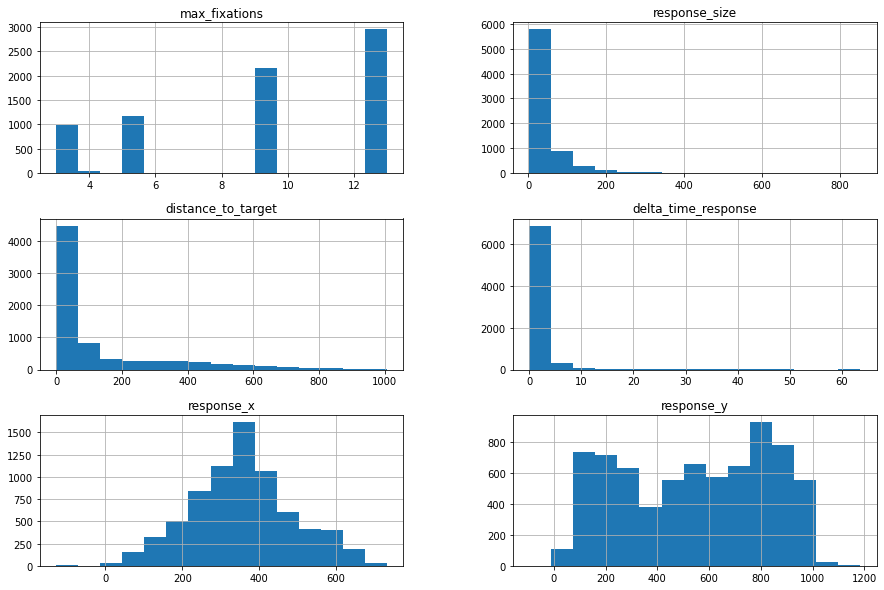

In [144]:
responses_data.loc[:,responses_data.columns!='subj'].hist(figsize=(15,10), bins=15);